In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/train/train_features_sent.csv")

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_tg = pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/train/train_labels_sent.csv")

In [4]:
import copy
df_clean=copy.deepcopy(df)
df_clean['energy_consumption_per_annum']=df_tg['energy_consumption_per_annum']

### Dropping some lines


In [5]:
df_clean= df_clean[df_clean['building_period']!='bad sup']

In [6]:
df_clean.dropna(subset=['has_balcony','heating_energy_source','living_area_sqft',
                  'main_water_heaters','water_heating_energy_source',
                 'window_frame_material'], inplace=True)


In [7]:
df_clean

,level_0,additional_heat_generators,additional_water_heaters,altitude,area_code,balcony_depth,bearing_wall_material,building_category,building_class,building_height_ft,...,water_heaters,water_heating_energy_source,water_heating_type,window_filling_type,window_frame_material,window_glazing_type,window_heat_retention_factor,window_orientation,window_thermal_conductivity,energy_consumption_per_annum
0,111323,[wood stove or insert],NaN,328.08400,881,NaN,CONCRETE,[],[],13.779528,...,[indeterminate oil boiler],oil,individual,argon or krypton,pvc,double glazing,1.116894,"[est,west]",15.347292,290.166345
1,265182,[],NaN,360.89240,260,NaN,NaN,[condo],[2 to 11],43.635172,...,[indeterminate gas boiler],gas,individual,argon or krypton,wood,double glazing,1.133072,"[est,west,sud]",17.512631,169.818197
2,927507,[],NaN,324.80316,573,NaN,WOOD - OTHER,[],[],19.685040,...,[standard gas boiler],gas,individual,dry air,pvc,double glazing,1.084204,"[est,west]",16.779108,144.499711
3,874620,[],NaN,288.71392,204,NaN,BRICKS,[],[],13.779528,...,[electric storage tank],electricity,individual,NaN,metal with thermal break,triple glazing,0.983338,"[est,north,sud]",12.630033,158.742715
4,563274,[],NaN,849.73756,374,NaN,GRITSTONE,[individual house],[individual],19.028872,...,[thermodynamic electric hot water (pac or tank)],thermodynamic electric hot water (heat pump or...,individual,dry air,pvc,double glazing,1.084204,"[north,sud]",13.290529,82.223648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010679,84908,[],gas condensing boiler,1591.20740,671,NaN,GRITSTONE,[individual house],[individual],17.060368,...,"[solar water heater,gas condensing boiler]",gas,collective,dry air,wood,double glazing,1.133072,"[est,west]",14.649374,250.513236
1010680,997676,[],NaN,688.97640,345,< 1 m,INDETERMINED,[],[],26.246720,...,[electric storage tank],electricity,individual,NaN,pvc,double glazing,1.000450,"[west,sud]",11.348055,265.278733
1010681,311831,[standard gas boiler],NaN,2805.11820,205,NaN,NaN,[individual house],[individual],22.637796,...,[wood boiler],wood,individual,argon or krypton,pvc,double glazing,0.983338,"[est,north,west,sud]",11.982461,311.681103
1010682,789794,[],NaN,708.66144,451,NaN,STONE,[],[],19.685040,...,[indeterminate oil boiler],oil,individual,argon or krypton,pvc,double glazing,1.084204,"[est,north,west,sud]",16.779108,340.538747


### Changing Values based on other categorical values

In [8]:
#change the value of the 'balcony_depth' column to 0 for the rows where 'has_balcony' is false
df_clean.loc[df_clean['has_balcony'] == False, 'balcony_depth'] = 0

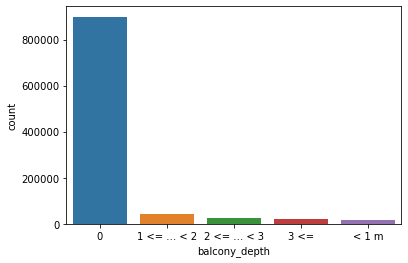

In [9]:
sns.countplot(data=df_clean,x=df_clean['balcony_depth'])
plt.show()

In [10]:
# Replacing NaN values of the features ['altitude','building_height_ft','building_total_area_sqft'] by the mean
# depending on the building type

df_mean = df_clean.groupby('building_type').mean()[['altitude','building_height_ft','building_total_area_sqft']]

for building_type in df_clean['building_type'].unique():
    df_clean.loc[(df_clean['altitude'].isna()) & (df_clean['building_type'] == building_type), 'altitude'] = df_mean.loc[building_type]['altitude']
    df_clean.loc[(df_clean['building_height_ft'].isna()) & (df_clean['building_type'] == building_type), 'building_height_ft'] = df_mean.loc[building_type]['building_height_ft']
    df_clean.loc[(df_clean['building_total_area_sqft'].isna()) & (df_clean['building_type'] == building_type), 'building_total_area_sqft'] = df_mean.loc[building_type]['building_total_area_sqft']


In [11]:
df_clean.isna().sum()

level_0                              0
additional_heat_generators           0
additional_water_heaters        800091
altitude                             0
area_code                            0
                                 ...  
window_glazing_type               4732
window_heat_retention_factor     21935
window_orientation                   0
window_thermal_conductivity       4699
energy_consumption_per_annum         0
Length: 72, dtype: int64

### Dropping less important features

In [12]:
features = ["nb_commercial_units","nb_gas_meters_commercial","nb_gas_meters_housing","nb_gas_meters_total",
            "nb_housing_units","nb_parking_spaces","nb_power_meters_housing","nb_power_meters_commercial",
            "nb_power_meters_total", "nb_units_total","renewable_energy_sources","building_use_type_code",
            "consumption_measurement_date",'main_heating_type','nb_meters',
           "outer_wall_materials","post_code","radon_risk_level","roof_material","water_heaters","window_filling_type",
           "window_orientation","main_heat_generators","building_category","clay_risk_level",
            "is_crossing_building","heat_generators","main_heating_type","level_0","water_heaters","main_water_heaters",
            "main_water_heating_type",'building_class']

def remove_features(df,features):        
    # removing features
    df_clean = df.drop(features,axis=1)
    return (df_clean)

df_clean = remove_features(df_clean,features)

In [13]:
df_clean['additional_water_heaters'].replace(np.nan,0,inplace=True)

In [14]:
df_clean.isnull().sum()

additional_heat_generators               0
additional_water_heaters                 0
altitude                                 0
area_code                                0
balcony_depth                         5647
bearing_wall_material                54010
building_height_ft                       0
building_period                          0
building_total_area_sqft                 0
building_type                            0
building_use_type_description            0
building_year                        59407
has_air_conditioning                     0
has_balcony                              0
heating_energy_source                    0
heating_type                             0
living_area_sqft                         0
lowe_floor_thermal_conductivity      77196
lower_floor_adjacency_type           72355
lower_floor_insulation_type          60903
lower_floor_material                 71772
nb_dwellings                             0
outer_wall_thermal_conductivity       7346
outer_wall_

### Dealing with missing values


In [15]:
def replacing_missing_values(df):
    #Feature Type
    fl_cols = list(df_clean.columns[df_clean.dtypes=="float64"])  # numerical
    int_cols = list(df_clean.columns[df_clean.dtypes=="int64"]) # categorical
    num=fl_cols+int_cols
    categ=list(df_clean.columns[df_clean.dtypes=="object"])
    
    
    for f in fl_cols:
        df[f] = df[f].fillna(df[f].mean())
    
    for n in int_cols:
        df[n] = df[n].fillna(df[n].median())
    
    for c in categ:
        df[c].fillna(df[c].mode()[0], inplace=True) 
    return df    
       

In [16]:
df_clean=replacing_missing_values(df_clean)

In [17]:
df_clean.isnull().sum()

additional_heat_generators          0
additional_water_heaters            0
altitude                            0
area_code                           0
balcony_depth                       0
bearing_wall_material               0
building_height_ft                  0
building_period                     0
building_total_area_sqft            0
building_type                       0
building_use_type_description       0
building_year                       0
has_air_conditioning                0
has_balcony                         0
heating_energy_source               0
heating_type                        0
living_area_sqft                    0
lowe_floor_thermal_conductivity     0
lower_floor_adjacency_type          0
lower_floor_insulation_type         0
lower_floor_material                0
nb_dwellings                        0
outer_wall_thermal_conductivity     0
outer_wall_thickness                0
percentage_glazed_surfaced          0
solar_heating                       0
solar_water_

In [18]:
categorical_features=list(df_clean.columns[df_clean.dtypes=="object"])


In [19]:
def remove_less_recurrent_values(df, feature):
    # Calculate the frequency of each value in the feature
    value_counts = df[feature].value_counts(normalize=True)
    threshold = 5e-04
    # Get the values that are less recurrent than the threshold
    to_remove = value_counts[value_counts < threshold].index
    
    # Remove these values from the feature
    df[feature].replace(to_remove, np.nan, inplace=True)
    
    # Drop the rows that contain a NaN in the feature
    df.dropna(subset=[feature], inplace=True)
    return df

# Iterate over the categorical features
for feature in categorical_features:
    df_clean = remove_less_recurrent_values(df_clean, feature)

### Label encoders


In [20]:
categ=list(df_clean.columns[df_clean.dtypes=="object"])
def label_encoding(df,categ):
    for c in categ:
        df[c] = df[c].astype(str)
        le = LabelEncoder()
        le.fit(df[c])
        df[c]=le.transform(df[c])
    return df    

In [21]:
df_clean=label_encoding(df_clean,categ)

### Remove outliers

In [22]:
df_clean= df_clean[df_clean['energy_consumption_per_annum']<3200]

In [25]:
df_clean.head()

,additional_heat_generators,additional_water_heaters,altitude,area_code,balcony_depth,bearing_wall_material,building_height_ft,building_period,building_total_area_sqft,building_type,...,upper_floor_thermal_conductivity,ventilation_type,wall_insulation_type,water_heating_energy_source,water_heating_type,window_frame_material,window_glazing_type,window_heat_retention_factor,window_thermal_conductivity,energy_consumption_per_annum
0,10,0,328.08400,881,0,12,13.779528,1,1291.6680,1,...,2.078260,7,3,5,1,4,0,1.116894,15.347292,290.166345
1,2,0,360.89240,260,0,0,43.635172,5,7136.4657,0,...,2.078260,11,3,1,1,5,0,1.133072,17.512631,169.818197
2,2,0,324.80316,573,0,26,19.685040,3,4197.9210,1,...,1.790967,9,3,1,1,4,0,1.084204,16.779108,144.499711
3,2,0,288.71392,204,0,6,13.779528,5,1646.8767,1,...,1.811218,2,3,0,1,1,2,0.983338,12.630033,158.742715
4,2,0,849.73756,374,0,18,19.028872,4,1033.3344,1,...,1.770545,3,3,6,1,4,0,1.084204,13.290529,82.223648


## Exporting the csv

In [24]:
df_clean.to_csv("../my_work/clean_data.csv")